## *set options

In [1]:
import pandas as pd

In [2]:
# 화면에 출력하는 데이터 프레임의 최대 row 수 500
pd.set_option('display.max_rows', 500)

# 화면에 출력하는 데이터 프레임의 최대 column 수 500
pd.set_option('display.max_columns', 500)

**1. zigzag_DB.db에 연결

In [3]:
# python에서 DB를 다루는 library인 sqlite3와 데이터를 다루는 library인 padas를 import합니다.
import pandas as pd
import sqlite3

In [4]:
query = "SELECT * FROM 'order'"
connect = sqlite3.connect("zigzag_DB.db")
order = pd.read_sql(query, connect)
order.head()

,timestamp,user_id,goods_id,shop_id,price
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000
1,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,1351,12,9500
2,2018-06-11 00:04:06.364,EyGjKYtSqZgqJ1ddKCtH5XwGirTyOH2P,646,14,22000
3,2018-06-11 00:04:17.258,KQBGi33Zxh5Dgu0WEkOkjN0YqTT_wxC3,5901,46,29800
4,2018-06-11 00:05:26.010,lq1Je3voA3a0MouSFba3629lKCvweI24,5572,89,29000


order 테이블의 각 행은 주문이 일어난 로그를 나타내며, 2018년 6월 11일 하루치 데이터가 주어졌습니다.

timestamp는 주문시각, user_id는 주문을 한 유저의 고유 아이디, goods_id는 상품의 id, shop_id는 쇼핑몰의 id, price는 상품의 가격을 나타냅니다.

**2. 당일 매출 상위 10개 쇼핑몰**

In [5]:
top10=pd.pivot_table(order,
               index="shop_id",
               values="price",
               aggfunc='sum'
               ).sort_values(by="price",ascending=False).head(10)
top10

,price
shop_id,
22,1365200
14,872000
63,710700
32,707900
126,669400
6,655900
11,653000
60,558300
19,518400


**3. 매출과 결제 건수를 함께 볼 수 있는 피벗테이블, 시각화**

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
pvt_price=pd.pivot_table(order,
            index="shop_id",
            values="price",
            aggfunc=('sum','count')
            ).sort_values('sum',ascending=False).head(10)

pvt_price[['sum','count']]



,sum,count
shop_id,,
22,1365200,99
14,872000,30
63,710700,27
32,707900,37
126,669400,39
6,655900,24
11,653000,19
60,558300,23
19,518400,19


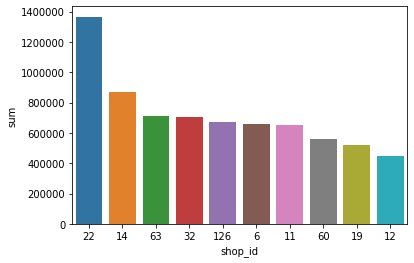

In [8]:
sns.barplot(data=pvt_price,x=pvt_price.index,y="sum",order=pvt_price.index)

**4. 6월 11일의 시간대별 매출**

In [9]:
import matplotlib as mpl

sns.set_style('whitegrid') #스타일은 원하는 것을 사용하세요.

mpl.rc('font', family='Malgun Gothic') # Mac의 경우는 AppleGothic, 윈도우의 경우는 Malgun Gothic을 사용하면 됩니다 :) 
mpl.rc('axes', unicode_minus=False)

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

C:\Users\meuch\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


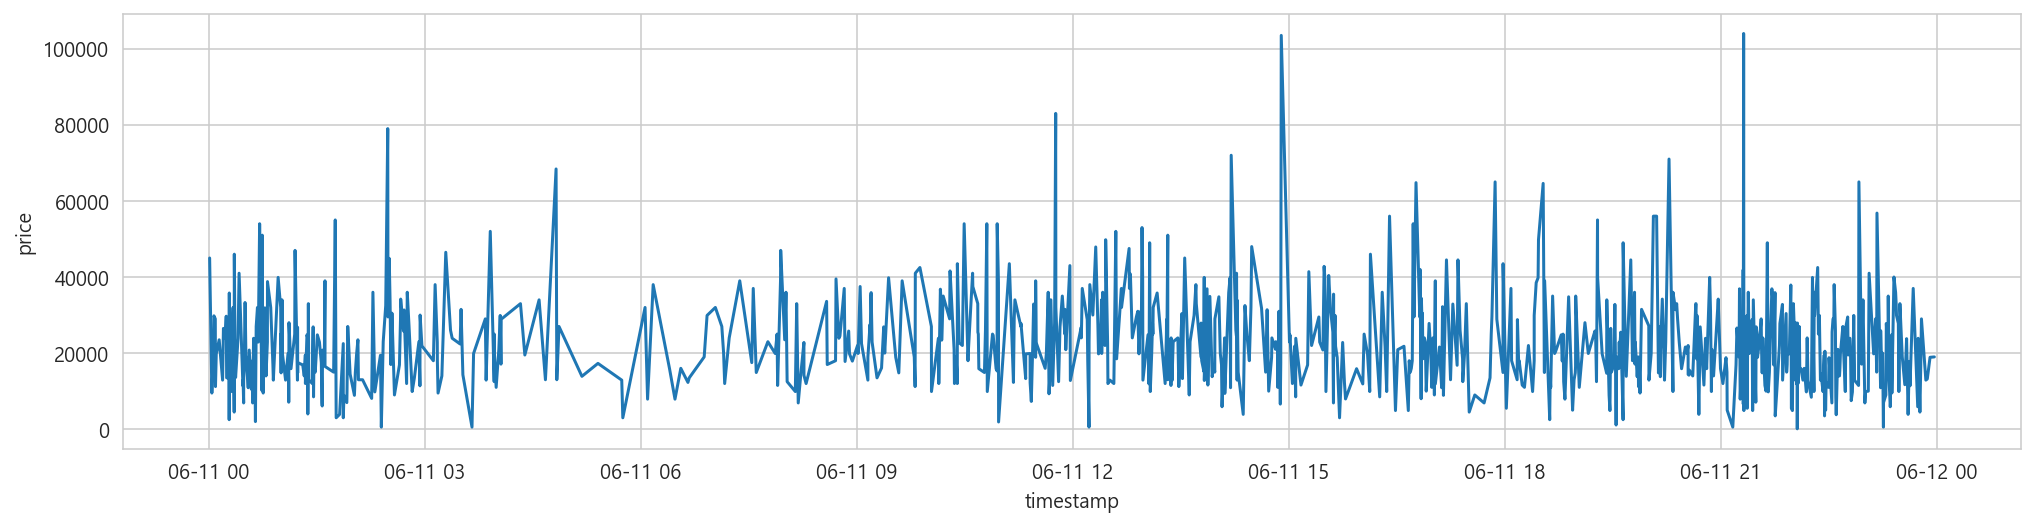

In [10]:
order["timestamp"]=pd.to_datetime(order["timestamp"])
plt.figure(figsize=(17,4))
sns.lineplot(data=order,
              x="timestamp",
              y="price",
              ci=None
              )

**5. 위의 시각화를 구간화(hour)**

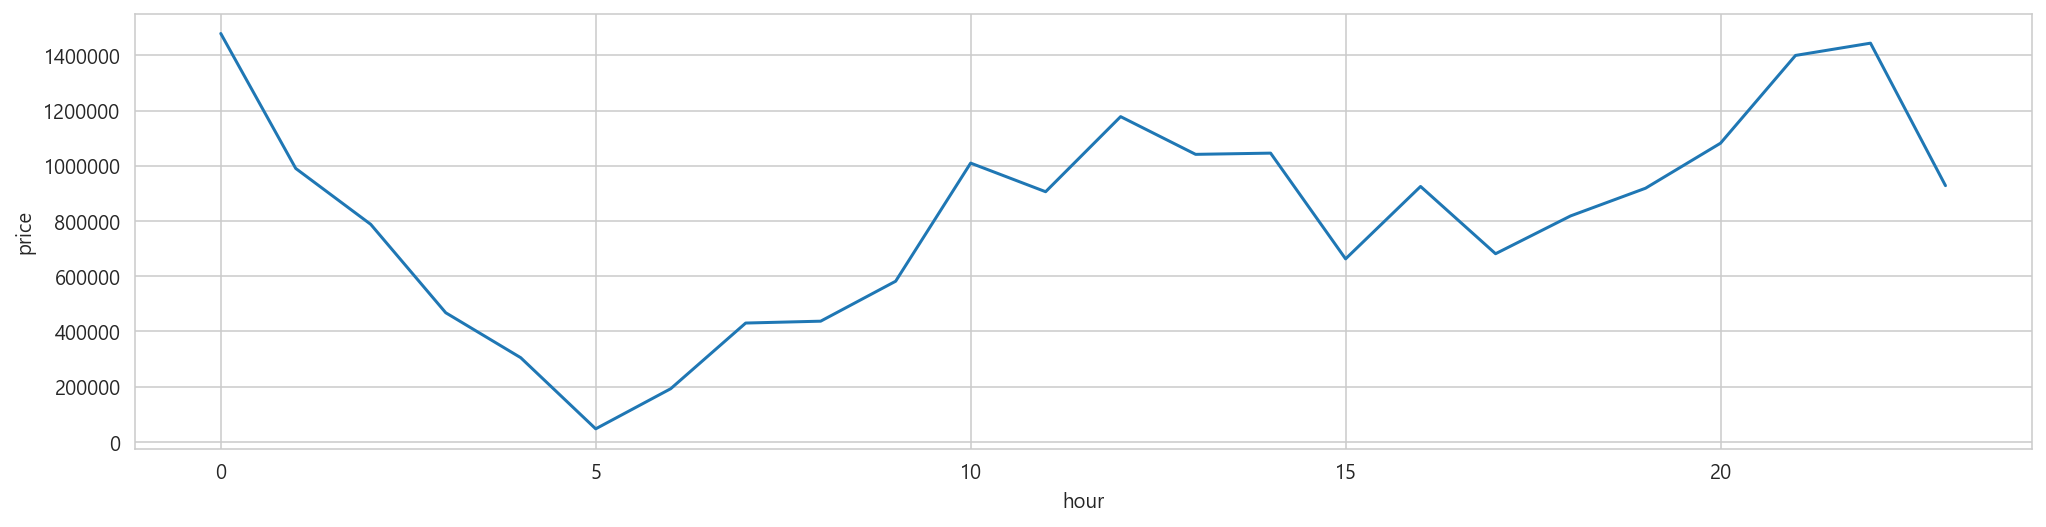

In [11]:
plt.figure(figsize=(17,4))
order["hour"]=order["timestamp"].dt.hour
pvt_h_sell=pd.pivot_table(order,
               index="hour",
               values="price",
               aggfunc="sum"
               )
sns.lineplot(data=pvt_h_sell,
             x=pvt_h_sell.index,
             y="price",
             ci=None,
             )

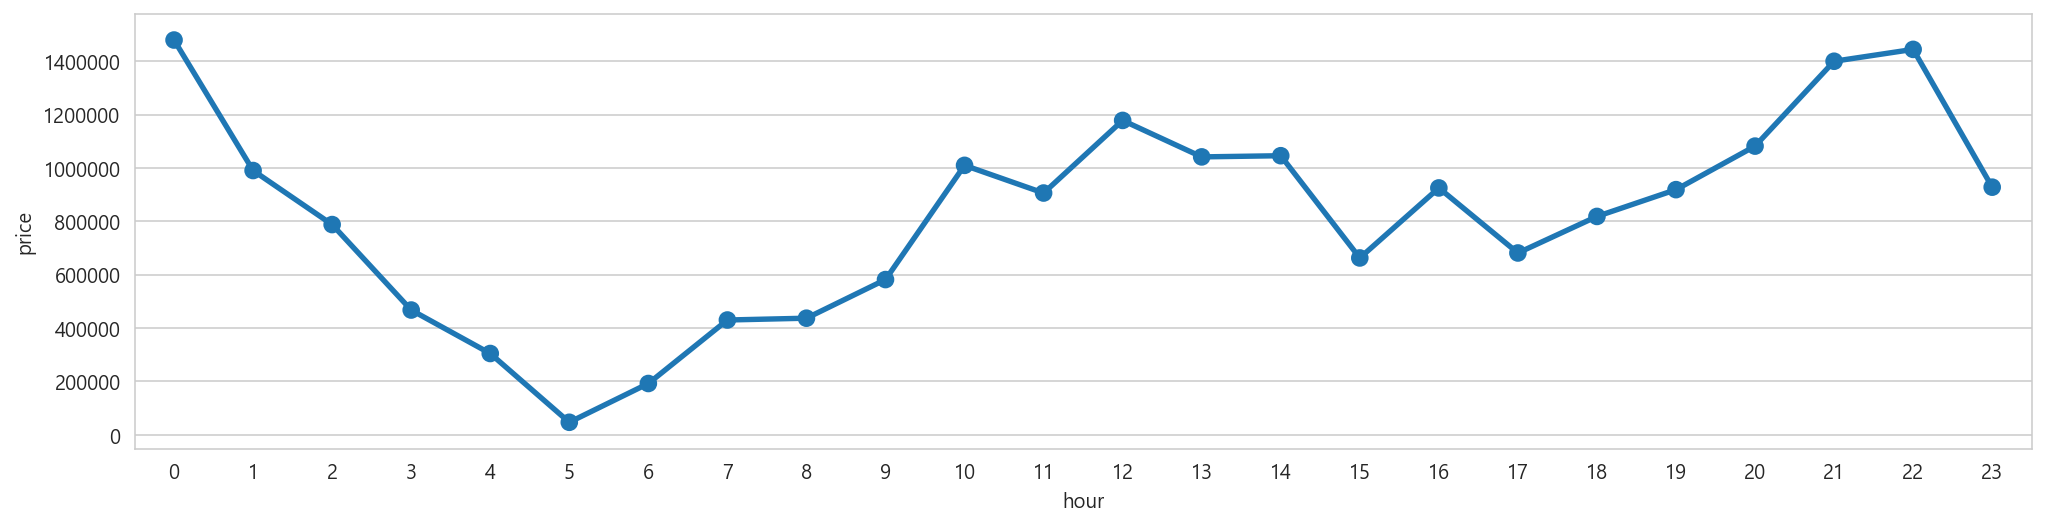

In [12]:
plt.figure(figsize=(17,4))
sns.pointplot(data=pvt_h_sell,
              x=pvt_h_sell.index,
              y="price"
              )

**6 . user 테이블 order 테이블과 병합.**

top 10 쇼핑몰 매출이 어떤 연령층에서 발생했는지 분석하고자한다.

In [13]:
query = "SELECT * FROM 'user'"
user = pd.read_sql(query,connect)
order.columns
m_ou=pd.merge(order,user,on="user_id",how="inner")
m_ou.head()

,timestamp,user_id,goods_id,shop_id,price,hour,os,age
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000,0,iOS,39
1,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,1351,12,9500,0,And,17
2,2018-06-11 00:04:06.364,EyGjKYtSqZgqJ1ddKCtH5XwGirTyOH2P,646,14,22000,0,And,-1
3,2018-06-11 00:04:17.258,KQBGi33Zxh5Dgu0WEkOkjN0YqTT_wxC3,5901,46,29800,0,And,34
4,2018-06-11 00:05:26.010,lq1Je3voA3a0MouSFba3629lKCvweI24,5572,89,29000,0,And,17


**7. 매출 Top 10 쇼핑몰 구매자들의 연령대를 쇼핑몰별로 시각화**

쇼핑몰이 설정한 타겟 연령대와 실제 구매층이 일치하는지를 비교해보고자 합니다.

나이 정보가 없는 경우는 -1이 입력되어 있기다.

(13, 47)

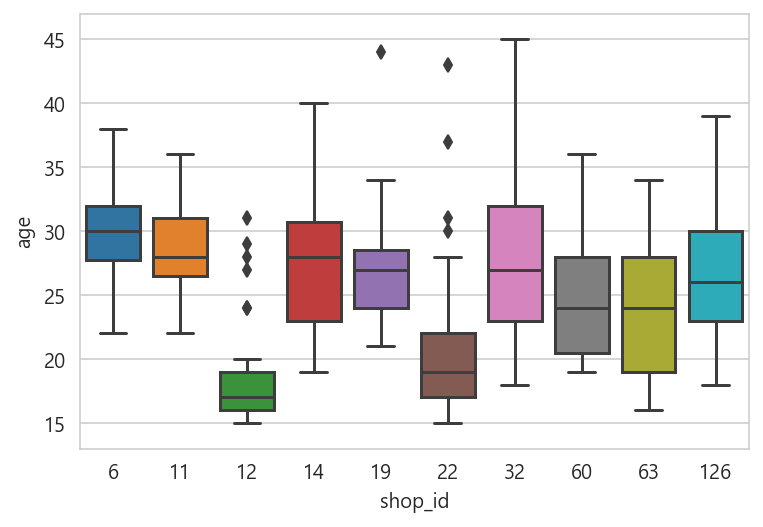

In [14]:
def select_top10(data):
    result=data["shop_id"] in top10.index
    return result

top_m_ou=m_ou[m_ou.apply(select_top10,axis=1)]

sns.boxplot(data = top_m_ou,
            x="shop_id",
            y="age",
            )
plt.ylim([13,47])


**8. user 테이블에 연령대를 나타내는 칼럼생성.**

1. 실제 나이를 바탕으로 user 테이블에 연령대 칼럼을 만들기

In [15]:
def make_generation(age):
    if age == -1:
        return '미입력'
    elif age // 10 >= 4:
        return "30대 후반"
    elif age // 10 == 1:
        return "10대"
    elif age % 10 < 3:
        return str(age // 10 * 10) + f"대 초반"
    elif age % 10 <= 6:
        return str(age // 10 * 10) + f"대 중반"
    else:
        return str(age // 10 * 10) + f"대 후반"

    
print(make_generation(10))
print(make_generation(23))
print(make_generation(29))
print(make_generation(32))
print(make_generation(35))
print(make_generation(40))

10대
20대 중반
20대 후반
30대 초반
30대 중반
30대 후반


In [16]:
# generation 열 생성
m_ou["연령대"]=m_ou["age"].apply(make_generation)


shop , user, order 병합

In [17]:
# shop read
query = "SELECT * FROM 'shop'"
shop=pd.read_sql(query, connect)

# merge order + user + shop
m_ous=pd.merge(m_ou,shop,on="shop_id",how='inner')
m_ous.head()

,timestamp,user_id,goods_id,shop_id,price,hour,os,age_x,연령대,name,category,age_y,style
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000,0,iOS,39,30대 후반,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌
1,2018-06-11 07:33:39.823,ni3NQK35j-YaSxli-C_Sz7ZmQqOwMljL,2278,38,37000,7,And,32,30대 초반,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌
2,2018-06-11 12:56:27.867,MnvhmV0tA89bN9TLXgRTbLza689bTkT9,5513,38,31000,12,And,37,30대 후반,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌
3,2018-06-11 22:57:11.582,3Vo9NP0qU_176pgbqk6Cu-CY7kpJ2-WB,7026,38,17100,22,iOS,34,30대 중반,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌
4,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,1351,12,9500,0,And,17,10대,Rachel,의류,10대/20대 초반,러블리/심플베이직


병합한 테이블을 이용하여 '거래연령 일치여부'  칼럼을  만들기

In [18]:
def check_generation(row):
    if row['category'] == '의류' and row['연령대'] == '미입력':
        return True
    else:
        return row['연령대'] in str(row['age_y'])

In [19]:
# compare
m_ous["거래연령 일치여부"]=m_ous.apply(check_generation,axis=1)

pvt_same=pd.pivot_table(m_ous,
        index='shop_id',
        values='거래연령 일치여부',
        aggfunc=['mean','count']
        )
pvt_same.head()

,mean,count
,거래연령 일치여부,거래연령 일치여부
shop_id,,
1,0.666667,3
2,0.937500,16
3,0.400000,5
4,1.000000,1
5,0.000000,1


위의 정보를 Top 10 쇼핑몰에 대해 뽑아보면 다음과 같은 결과가 나옵니다. 

In [20]:
pvt_same[pvt_same.index.isin(top10.index)]

,mean,count
,거래연령 일치여부,거래연령 일치여부
shop_id,,
6,0.750000,24
11,0.684211,19
12,0.857143,42
14,0.566667,30
19,0.789474,19
22,0.929293,99
32,0.540541,37
60,0.695652,23


**9. 쇼핑몰의 스타일 태그를 정리**

In [21]:
style_list = ['페미닌', '모던시크', '심플베이직', '러블리', '유니크', '미시스타일', '캠퍼스룩', '빈티지', '섹시글램', '스쿨룩', '로맨틱', '오피스룩',
              '럭셔리', '헐리웃스타일', '심플시크', '키치', '펑키', '큐티', '볼드&에스닉' ]

In [22]:
# make empty df, then fill with False

dummy_df=pd.DataFrame(index=range(len(m_ous)),
             columns=style_list)
dummy_df=dummy_df.fillna(False)


# Fill True
for i in range(len(shop)):
    if shop["style"][i]!=None:
        seperation=shop["style"][i].split('/')
    for j in seperation:
        idx=style_list.index(j)
        dummy_df.loc[i][idx]=True


# concat
shop=pd.concat([shop,dummy_df],axis=1)
shop=shop.set_index("shop_id")
shop.head()


,name,category,age,style,페미닌,모던시크,심플베이직,러블리,유니크,미시스타일,캠퍼스룩,빈티지,섹시글램,스쿨룩,로맨틱,오피스룩,럭셔리,헐리웃스타일,심플시크,키치,펑키,큐티,볼드&에스닉
shop_id,,,,,,,,,,,,,,,,,,,,,,,
1.0,Edna,의류,20대 중반/20대 후반/30대 초반,모던시크/러블리,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2.0,Pam,의류,20대 중반/20대 후반/30대 초반,러블리/심플베이직,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3.0,Carolyn,의류,20대 중반/20대 후반/30대 초반,모던시크/심플베이직,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4.0,Joan,의류,30대 초반/30대 중반,미시스타일/유니크,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
5.0,Florene,의류,20대 중반/20대 후반/30대 초반,심플베이직/헐리웃스타일,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


**10. 스타일별 실제 구매 기록을 바탕으로 가장 구매가 많이 일어난 스타일 키워드 찾기, 매출이 가장 많은 3가지 스타일의 구매 연령대 분포.**


위에서 전처리한 스타일을 이용하기 위해 order, shop, user 테이블을 다시 테이블을 병합하도록 하겠습니다.

In [23]:
merged = (
    order.merge(shop, on='shop_id')
             .merge(user, on='user_id')
)
print(merged.shape)
merged.head(3)

(867, 31)


,timestamp,user_id,goods_id,shop_id,price,hour,name,category,age_x,style,페미닌,모던시크,심플베이직,러블리,유니크,미시스타일,캠퍼스룩,빈티지,섹시글램,스쿨룩,로맨틱,오피스룩,럭셔리,헐리웃스타일,심플시크,키치,펑키,큐티,볼드&에스닉,os,age_y
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000,0,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,iOS,39
1,2018-06-11 07:33:39.823,ni3NQK35j-YaSxli-C_Sz7ZmQqOwMljL,2278,38,37000,7,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,And,32
2,2018-06-11 12:56:27.867,MnvhmV0tA89bN9TLXgRTbLza689bTkT9,5513,38,31000,12,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,And,37


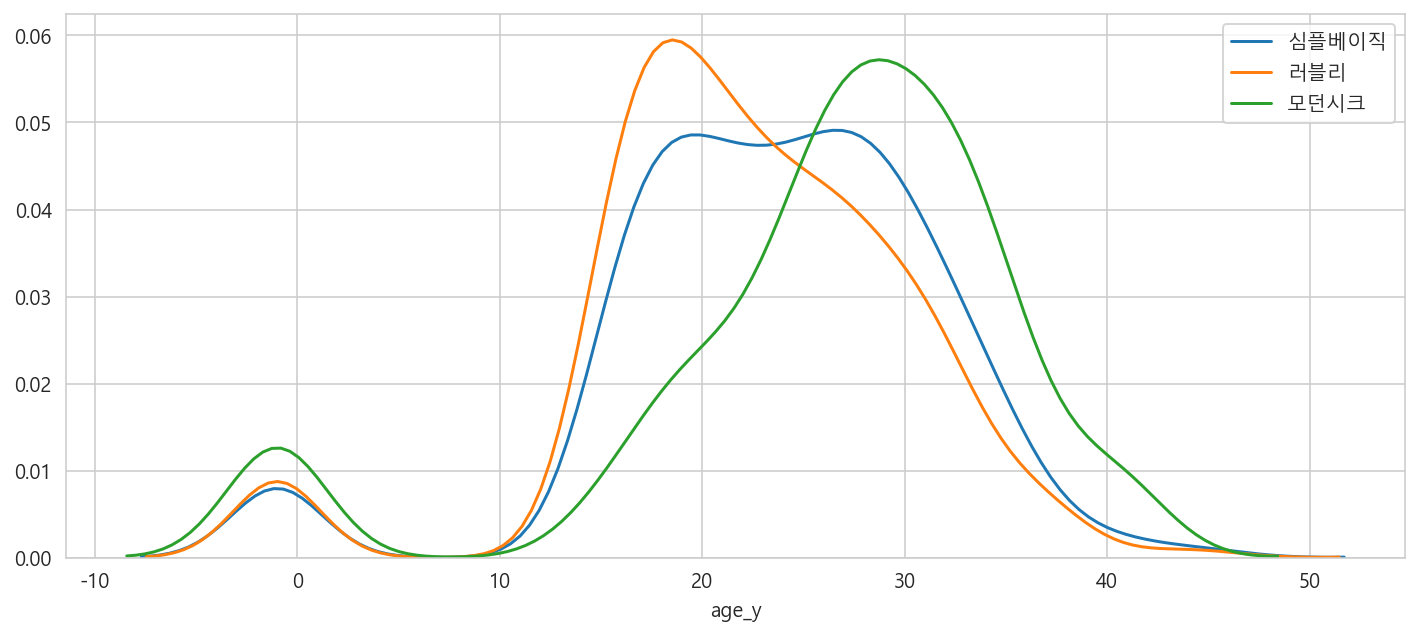

In [24]:
plt.figure(figsize=(12,5))

one=merged[merged["심플베이직"] ==True]
two=merged[merged["러블리"] ==True]
three=merged[merged["모던시크"] ==True]

sns.distplot(one["age_y"],hist=False,label="심플베이직")
sns.distplot(two["age_y"],hist=False,label="러블리")
sns.distplot(three["age_y"],hist=False,label="모던시크")

**11. log 데이터 수정.**

In [25]:
data_logs=pd.read_sql("SELECT * FROM 'log'", connect)
data_logs["timestamp"]=pd.to_datetime(data_logs["timestamp"])

user_id을 간단하게 0, 1, 2, 3 ...과 같이 연속된 정수 형태로 변환.

In [26]:
user_id = user['user_id'].unique()

In [27]:
n_user_id=range(len(user_id))

In [28]:
id_zip = zip(user_id, n_user_id)

In [29]:
#zip()의 결과를 구체적으로 보기 위하여 list로 변환하여 print하겠습니다. 상위 5개만 출력합니다.
list(zip(user_id, n_user_id))[:5]


[('--PYPMX8QWg0ioT5zfORmU-S5Lln0lot', 0),
 ('-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv', 1),
 ('-1de9sT-MLwVVvnC0ncCLnqEqpSi3XSN', 2),
 ('-3A3L2jnM55B_Q1bRXMjZ6sPnINIj-Y1', 3),
 ('-3bhcSgPOIdQAPkPNcchxvECGqGQQ78k', 4)]

In [30]:
#새로운 id와 기존의 id가 대응된 딕셔너리 타입 변수를 생성합니다.
id_dict = dict(id_zip)

data_logs["n_user_id"] = data_logs['user_id'].map(id_dict)
order["n_user_id"] = order['user_id'].map(id_dict)
user["n_user_id"] = user['user_id'].map(id_dict)
data_logs[['user_id', 'n_user_id']].head()

,user_id,n_user_id
0,K1d8_t3-QIskaSkrx32oAFu856D8JmLo,3314
1,lwFZ77v_ygk0uU40t1ud3l30EZ6sE2R3,7844
2,mR-bO6hC9g-m8ERXMRQZaRwJFvzNNdd8,7920
3,K1d8_t3-QIskaSkrx32oAFu856D8JmLo,3314
4,Yjny5AchUWLiuv4kdeq50COF-S8OFXPd,5608


In [31]:
# data_logs, order, user에 id_idct를 mapping하여 각 데이터 프레임에 새로운 고객 id컬럼인 n_user_id를 만듭니다.

map_order=order['user_id'].map(id_dict)
map_user=user['user_id'].map(id_dict)

order['n_user_id']=map_log
user['n_user_id']=map_log



# 결과를 확인합니다.
data_logs[['user_id', 'n_user_id']].head()

NameError: name 'map_log' is not defined

 **12. 주문 데이터, 로그 데이터 concat.**

In [32]:
data_logs.loc[data_logs["user_id"] == "bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx"]

,timestamp,user_id,event_origin,event_name,event_goods_id,event_shop_id,n_user_id
878,2018-06-11 00:06:45.357,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨,app_page_view,NaN,NaN,6241
901,2018-06-11 00:06:54.034,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨바지,app_page_view,NaN,NaN,6241
1062,2018-06-11 00:08:00.579,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨바지,enter_browser,2048.0,46.0,6241
1259,2018-06-11 00:09:38.881,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨바지,app_page_view,NaN,NaN,6241
1439,2018-06-11 00:11:04.446,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨바지,enter_browser,3486.0,38.0,6241
1473,2018-06-11 00:11:20.354,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨바지,app_page_view,NaN,NaN,6241
1526,2018-06-11 00:11:48.284,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨바지,enter_browser,4006.0,24.0,6241
2423,2018-06-11 00:18:21.906,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨바지,app_page_view,NaN,NaN,6241
2529,2018-06-11 00:19:01.928,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨,app_page_view,NaN,NaN,6241
2758,2018-06-11 00:20:30.432,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,shops_bookmark,app_page_view,NaN,NaN,6241


로그 테이블에는 이 사람이 구매를 했는지에 대한 정보가 전혀 없기 때문에 order 테이블과 log 테이블을 병합

기록 중에, 주문을 했지만 그 전의 로그 정보가 전혀 없는 고객들이 있다. 이들은 전날에 로그 기록이 존재하고 6월 11일 자정 이후 결제를 한 것으로 추정됨. 이들은 잔존 시간을 계산하는데 오류를 일으키므로 이들을 제외하고 concat.

In [33]:
# 주문한 고객의 수를 user_number_order에 저장.
user_set = set(order['user_id'])
user_number_order = len(user_set)

# log에 기록된 고객의 수를 user_number_log에 저장.
log_set = set(data_logs['user_id'])
user_number_log = len(log_set)

# 중복된 고객의 수를 user_duplicated에 저장.
user_duplicated = user_set & log_set

# 결과를 출력합니다.
print('해당 날짜에 구매한 총 고객수 입니다 :',user_number_order, end ='명\n')
print('해당 날짜 log데이터에 기록된 총 고객수입니다 :',user_number_log,  end ='명\n')
print('중복되는 고객수입니다 :', len(user_duplicated) , end ='명\n')

해당 날짜에 구매한 총 고객수 입니다 : 832명
해당 날짜 log데이터에 기록된 총 고객수입니다 : 9909명
중복되는 고객수입니다 : 742명


중복되는 고객의 목록을 구하였으므로 이제는 두 데이터들을 concat하기 위해 column명을 동일하게.

In [34]:
print(order.columns)
print(data_logs.columns)

Index(['timestamp', 'user_id', 'goods_id', 'shop_id', 'price', 'hour',
       'n_user_id'],
      dtype='object')
Index(['timestamp', 'user_id', 'event_origin', 'event_name', 'event_goods_id',
       'event_shop_id', 'n_user_id'],
      dtype='object')


In [35]:
# order 원본을 변형하지 않기 위해 order을 copy하여 사용. 
order_copy = order.copy()

In [36]:
# 겹치는 유저만으로 data를 indexing. user_duplicated 이용합니다. 
order_copy = order_copy[order_copy['user_id'].isin(user_duplicated)]


order_copy['event_origin'] = order_copy['shop_id']

order_copy['event_name'] = 'purchase'

order_copy['event_goods_id'] = order_copy['goods_id']

# 사용할 columns
order_copy = order_copy[['timestamp', 'n_user_id', 'user_id','event_origin',
         'event_name', 'event_goods_id', 'price']]

order_copy.head()


,timestamp,n_user_id,user_id,event_origin,event_name,event_goods_id,price
0,2018-06-11 00:00:43.032,6241,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,38,purchase,1414,45000
1,2018-06-11 00:02:33.763,8899,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,12,purchase,1351,9500
4,2018-06-11 00:05:26.010,7832,lq1Je3voA3a0MouSFba3629lKCvweI24,89,purchase,5572,29000
5,2018-06-11 00:05:35.182,2745,GM0-EsJPHjkpteIpAQIwaCdUjU81lhW1,22,purchase,55,11200
6,2018-06-11 00:06:14.314,7800,lgvWxrv7r5RGklXSJqM2x6NUBZ5H-RQZ,22,purchase,2451,19800


In [37]:
# data_logs, order_copy를 concat

log_order = pd.concat([data_logs, order_copy], sort = False)

log_order.shape


(106587, 8)

----

 log_order에 구매기록여부 purchase 추가.

In [38]:
log_order['purchase'] = log_order["price"].notnull()

log_order.head()

,timestamp,user_id,event_origin,event_name,event_goods_id,event_shop_id,n_user_id,price,purchase
0,2018-06-11 00:00:00.213,K1d8_t3-QIskaSkrx32oAFu856D8JmLo,shops_ranking,app_page_view,NaN,NaN,3314,NaN,False
1,2018-06-11 00:00:00.810,lwFZ77v_ygk0uU40t1ud3l30EZ6sE2R3,shops_bookmark,app_page_view,NaN,NaN,7844,NaN,False
2,2018-06-11 00:00:00.956,mR-bO6hC9g-m8ERXMRQZaRwJFvzNNdd8,goods_search_result/로브,app_page_view,NaN,NaN,7920,NaN,False
3,2018-06-11 00:00:01.084,K1d8_t3-QIskaSkrx32oAFu856D8JmLo,shops_bookmark,app_page_view,NaN,NaN,3314,NaN,False
4,2018-06-11 00:00:01.561,Yjny5AchUWLiuv4kdeq50COF-S8OFXPd,shops_bookmark,app_page_view,NaN,NaN,5608,NaN,False


----

In [39]:
log_order=log_order.sort_values(['user_id','timestamp'],ascending=True).reset_index()
log_order.head()

,index,timestamp,user_id,event_origin,event_name,event_goods_id,event_shop_id,n_user_id,price,purchase
0,52042,2018-06-11 15:57:10.615,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,shops_bookmark,app_page_view,NaN,NaN,0,NaN,False
1,52185,2018-06-11 15:59:05.505,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,shops_bookmark,app_page_view,NaN,NaN,0,NaN,False
2,7571,2018-06-11 00:55:37.309,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,my_goods,app_page_view,NaN,NaN,1,NaN,False
3,7589,2018-06-11 00:55:44.430,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,my_goods,enter_browser,2506.0,40.0,1,NaN,False
4,8150,2018-06-11 01:00:33.295,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,my_goods,app_page_view,NaN,NaN,1,NaN,False


**13. 사용자별 page duration **

현재 데이터에서는 고객이 앱을 종료하는 기록이 없기 때문에 마지막 log의 log_duration은 0이라고 가정.

In [40]:
# 우선, timestamp 컬럼를 datetime 타입으로 변환해주세요.

log_order['timestamp']=pd.to_datetime(log_order['timestamp'])

----

In [41]:
# timestamp_after
log_order['timestamp_after'] = log_order.groupby(['n_user_id'])['timestamp'].shift(-1)

log_order.head()

,index,timestamp,user_id,event_origin,event_name,event_goods_id,event_shop_id,n_user_id,price,purchase,timestamp_after
0,52042,2018-06-11 15:57:10.615,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,shops_bookmark,app_page_view,NaN,NaN,0,NaN,False,2018-06-11 15:59:05.505
1,52185,2018-06-11 15:59:05.505,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,shops_bookmark,app_page_view,NaN,NaN,0,NaN,False,NaT
2,7571,2018-06-11 00:55:37.309,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,my_goods,app_page_view,NaN,NaN,1,NaN,False,2018-06-11 00:55:44.430
3,7589,2018-06-11 00:55:44.430,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,my_goods,enter_browser,2506.0,40.0,1,NaN,False,2018-06-11 01:00:33.295
4,8150,2018-06-11 01:00:33.295,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,my_goods,app_page_view,NaN,NaN,1,NaN,False,2018-06-11 01:11:03.608


timestamp_after과 timestamp의 차이를 계산하여 page_duration을 구한다.
이후 NaN값을 0으로 채워준다.

----


In [42]:
# log_duration을 계산하고 nan값(마지막 로그)는 0으로 채워 log_duration 컬럼에 저장합니다.
log_order['page_duration']=log_order['timestamp_after']-log_order['timestamp']
log_order['page_duration']=log_order['page_duration'].fillna(0)

log_order[['timestamp','timestamp_after','page_duration']].head()

C:\Users\meuch\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Passing integers to fillna is deprecated, will raise a TypeError in a future version.  To retain the old behavior, pass pd.Timedelta(seconds=n) instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,timestamp,timestamp_after,page_duration
0,2018-06-11 15:57:10.615,2018-06-11 15:59:05.505,00:01:54.890000
1,2018-06-11 15:59:05.505,NaT,00:00:00
2,2018-06-11 00:55:37.309,2018-06-11 00:55:44.430,00:00:07.121000
3,2018-06-11 00:55:44.430,2018-06-11 01:00:33.295,00:04:48.865000
4,2018-06-11 01:00:33.295,2018-06-11 01:11:03.608,00:10:30.313000


----

page_duration을 초로 환산,float으로 변환.  

In [43]:
log_order['page_duration'] = log_order['page_duration'].map(lambda x: x.total_seconds()).astype('float') 
#log_order['page_duration'].dt.total_seconds()

log_order[['n_user_id','timestamp', 'timestamp_after', 'page_duration']].head()

,n_user_id,timestamp,timestamp_after,page_duration
0,0,2018-06-11 15:57:10.615,2018-06-11 15:59:05.505,114.890
1,0,2018-06-11 15:59:05.505,NaT,0.000
2,1,2018-06-11 00:55:37.309,2018-06-11 00:55:44.430,7.121
3,1,2018-06-11 00:55:44.430,2018-06-11 01:00:33.295,288.865
4,1,2018-06-11 01:00:33.295,2018-06-11 01:11:03.608,630.313


----

**14. SESSION **

세션(session) : 사용자가 앱을 실행하는 단위.

session을 구하기 위해서 고객이 session을 종료하고 앱을 나갔는지 여부(boolean)인 is_out이라는 컬럼생성.

In [44]:
# 40분을 초로 환산해야 합니다.
log_order["is_out"] = (log_order["page_duration"] > 2400) | (log_order["page_duration"] == 0 )

log_order[['n_user_id','timestamp', 'timestamp_after', 'page_duration', 'is_out']].head()

,n_user_id,timestamp,timestamp_after,page_duration,is_out
0,0,2018-06-11 15:57:10.615,2018-06-11 15:59:05.505,114.890,False
1,0,2018-06-11 15:59:05.505,NaT,0.000,True
2,1,2018-06-11 00:55:37.309,2018-06-11 00:55:44.430,7.121,False
3,1,2018-06-11 00:55:44.430,2018-06-11 01:00:33.295,288.865,False
4,1,2018-06-11 01:00:33.295,2018-06-11 01:11:03.608,630.313,False


page_duration이 2400(40분)이상 또는 0인 log들은 session의 마지막 log.

예를 들어, page_duration이 36000인 log가 있으면 이는 10시간 뒤에 다시 app에 접속한다는 것을 의미하는 것이지 실제 10시간 동안 앱을 사용했다는 의미가 아니다. 

따라서 이 사람에 대한 해당 log는 해당 session의 마지막 log가 되고 다음 log는 10시간 뒤인 다음 session의 첫 log가 된다.

is_out 컬럼이 True인 page_duration을 0으로 지정.

In [45]:
log_order.loc[log_order['is_out'], 'page_duration'] = 0

log_order[['n_user_id','timestamp', 'timestamp_after', 'page_duration', 'is_out']].head(20)

,n_user_id,timestamp,timestamp_after,page_duration,is_out
0,0,2018-06-11 15:57:10.615,2018-06-11 15:59:05.505,114.890,False
1,0,2018-06-11 15:59:05.505,NaT,0.000,True
2,1,2018-06-11 00:55:37.309,2018-06-11 00:55:44.430,7.121,False
3,1,2018-06-11 00:55:44.430,2018-06-11 01:00:33.295,288.865,False
4,1,2018-06-11 01:00:33.295,2018-06-11 01:11:03.608,630.313,False
5,1,2018-06-11 01:11:03.608,2018-06-11 01:11:05.713,2.105,False
6,1,2018-06-11 01:11:05.713,2018-06-11 01:12:09.565,63.852,False
7,1,2018-06-11 01:12:09.565,2018-06-11 01:12:28.850,19.285,False
8,1,2018-06-11 01:12:28.850,NaT,0.000,True
9,2,2018-06-11 02:21:04.848,2018-06-11 02:21:18.719,13.871,False


----

session별 고유 번호(session_idx_unique) 

일(day)마다 0부터 시작하는 daily session 번호(session_idx_daily) 생성

In [46]:
log_order['is_out-cumsum()'] = log_order['is_out'].cumsum()
log_order["is_out-cumsum()-shift(1)"] = log_order['is_out-cumsum()'].shift(1)
log_order["is_out-cumsum()-shift(1)-fillna(0)"] = log_order["is_out-cumsum()-shift(1)"].fillna(0)
log_order["is_out-cumsum()-shift(1)-fillna(0)-astype(int)"] = log_order["is_out-cumsum()-shift(1)-fillna(0)"].astype(int)

log_order['session_idx_unique'] = (log_order['is_out']
                                 .cumsum() # 컬럼의 누적 합계를 반환합니다.
                                 .shift(1)
                                 .fillna(0)
                                 .astype(int)
                                )

log_order[['n_user_id','timestamp', 'timestamp_after', 'page_duration', 'is_out','is_out',
           'is_out-cumsum()','is_out-cumsum()-shift(1)', 'is_out-cumsum()-shift(1)-fillna(0)',
           'is_out-cumsum()-shift(1)-fillna(0)-astype(int)','session_idx_unique']].head(10)

,n_user_id,timestamp,timestamp_after,page_duration,is_out,is_out,is_out-cumsum(),is_out-cumsum()-shift(1),is_out-cumsum()-shift(1)-fillna(0),is_out-cumsum()-shift(1)-fillna(0)-astype(int),session_idx_unique
0,0,2018-06-11 15:57:10.615,2018-06-11 15:59:05.505,114.890,False,False,0,NaN,0.0,0,0
1,0,2018-06-11 15:59:05.505,NaT,0.000,True,True,1,0.0,0.0,0,0
2,1,2018-06-11 00:55:37.309,2018-06-11 00:55:44.430,7.121,False,False,1,1.0,1.0,1,1
3,1,2018-06-11 00:55:44.430,2018-06-11 01:00:33.295,288.865,False,False,1,1.0,1.0,1,1
4,1,2018-06-11 01:00:33.295,2018-06-11 01:11:03.608,630.313,False,False,1,1.0,1.0,1,1
5,1,2018-06-11 01:11:03.608,2018-06-11 01:11:05.713,2.105,False,False,1,1.0,1.0,1,1
6,1,2018-06-11 01:11:05.713,2018-06-11 01:12:09.565,63.852,False,False,1,1.0,1.0,1,1
7,1,2018-06-11 01:12:09.565,2018-06-11 01:12:28.850,19.285,False,False,1,1.0,1.0,1,1
8,1,2018-06-11 01:12:28.850,NaT,0.000,True,True,2,1.0,1.0,1,1
9,2,2018-06-11 02:21:04.848,2018-06-11 02:21:18.719,13.871,False,False,2,2.0,2.0,2,2


In [47]:
log_order['is_out-cumsum()'] = log_order.groupby('n_user_id')['is_out'].cumsum()
log_order["is_out-cumsum()-shift(1)"] = log_order.groupby('n_user_id')['is_out'].cumsum().shift(1)
log_order["is_out-cumsum()-shift(1)-fillna(0)"] = log_order.groupby('n_user_id')['is_out'].cumsum().shift(1).fillna(0)
log_order["is_out-cumsum()-shift(1)-fillna(0)-astype(int)"] = log_order.groupby('n_user_id')['is_out'].cumsum().shift(1).fillna(0).astype(int)



log_order['session_idx_daily'] = (log_order.groupby('n_user_id')['is_out']                     
                                           .cumsum()
                                           .shift(1)
                                           .fillna(0)
                                           .astype(int)                      
                                    )

# user마다 첫 session_idx_daily가 1로 되어있기 때문에 이를 0으로 바꿔줍니다.
head_index = log_order.groupby('n_user_id')['session_idx_daily'].head(1).index
log_order.loc[head_index, 'session_idx_daily'] = 0

log_order[['n_user_id','timestamp', 'timestamp_after', 'page_duration','is_out','is_out-cumsum()',
           'is_out-cumsum()-shift(1)', 'is_out-cumsum()-shift(1)-fillna(0)',
           'is_out-cumsum()-shift(1)-fillna(0)-astype(int)', 'session_idx_daily']].head(10)

,n_user_id,timestamp,timestamp_after,page_duration,is_out,is_out-cumsum(),is_out-cumsum()-shift(1),is_out-cumsum()-shift(1)-fillna(0),is_out-cumsum()-shift(1)-fillna(0)-astype(int),session_idx_daily
0,0,2018-06-11 15:57:10.615,2018-06-11 15:59:05.505,114.890,False,0.0,NaN,0.0,0,0
1,0,2018-06-11 15:59:05.505,NaT,0.000,True,1.0,0.0,0.0,0,0
2,1,2018-06-11 00:55:37.309,2018-06-11 00:55:44.430,7.121,False,0.0,1.0,1.0,1,0
3,1,2018-06-11 00:55:44.430,2018-06-11 01:00:33.295,288.865,False,0.0,0.0,0.0,0,0
4,1,2018-06-11 01:00:33.295,2018-06-11 01:11:03.608,630.313,False,0.0,0.0,0.0,0,0
5,1,2018-06-11 01:11:03.608,2018-06-11 01:11:05.713,2.105,False,0.0,0.0,0.0,0,0
6,1,2018-06-11 01:11:05.713,2018-06-11 01:12:09.565,63.852,False,0.0,0.0,0.0,0,0
7,1,2018-06-11 01:12:09.565,2018-06-11 01:12:28.850,19.285,False,0.0,0.0,0.0,0,0
8,1,2018-06-11 01:12:28.850,NaT,0.000,True,1.0,0.0,0.0,0,0
9,2,2018-06-11 02:21:04.848,2018-06-11 02:21:18.719,13.871,False,0.0,1.0,1.0,1,0


**14.1) session별 log 수(접속별 활동 개수)**

In [49]:
cycle_log_count = (log_order
                 .groupby(['n_user_id', 'session_idx_daily']) 
                 .size()  # 그룹별 속한 row 수(log 수)를 반환합니다.
                 .reset_index()  # index를 초기화합니다.
                 .rename(columns = { 0 : "log_count"} )   # 컬럼이름을 log_count로 변경합니다.
                )

cycle_log_count.head(5)

,n_user_id,session_idx_daily,log_count
0,0,0,2
1,1,0,7
2,2,0,13
3,2,1,4
4,2,2,31


**14.2) user별 session당 평균 활동수**

In [59]:
cycle_user_log_count=cycle_log_count.groupby('n_user_id')['log_count'].mean().reset_index()
cycle_user_log_count.head()

,n_user_id,log_count
0,0,2.000000
1,1,7.000000
2,2,15.666667
3,3,7.750000
4,4,2.000000


**14.3) 하루동안 가장 많은 session을 갖는(가장 많이 활동한) 상위 5명의 user.**

In [51]:
count_log=cycle_log_count.groupby('n_user_id')['session_idx_daily'].size().reset_index().rename(columns={'session_idx_daily' : 'count'})
count_log.sort_values('count',ascending=False).head()

,n_user_id,count
5796,5847,11
5956,6010,10
2230,2249,10
2800,2824,9
8275,8347,9


**15. 잔존시간**

**15.1) user**



먼저 cycle별 잔존시간을 다음과 같이 구합니다.

In [53]:
remaining_time_cycle = (log_order.groupby(['n_user_id', 'session_idx_daily'])['page_duration']
                         .sum()
                         .reset_index()
                         .rename(columns = {'log_duration' : 'page_duration'})
                       )

remaining_time_cycle.head(10)


,n_user_id,session_idx_daily,page_duration
0,0,0,114.890
1,1,0,1011.541
2,2,0,893.742
3,2,1,69.618
4,2,2,3075.422
5,3,0,0.000
6,3,1,45.911
7,3,2,85.183
8,3,3,1711.031
9,4,0,49.130


In [54]:
pd.DataFrame(remaining_time_cycle.groupby('n_user_id')['page_duration'].mean()).rename(columns={'page_duration':'duration'}).head(10)

,duration
n_user_id,
0,114.890000
1,1011.541000
2,1346.260667
3,460.531250
4,49.130000
5,0.000000
6,1791.532000
7,2580.258000
8,984.298000


잔존 시간이 0인 것들은 app에 들어와서 아무것도 안하고 나간 고객들.


**15.2) 구매/비구매 session별 평균 잔존시간 구하기**

session_purchase 변수에 구매기록이 있는 cycle들을 저장.

In [56]:
session_purchase=log_order[log_order['purchase']==True]['session_idx_unique'].unique()


---

In [57]:
data_purchase = log_order.loc[log_order['session_idx_unique'].isin(session_purchase)]
data_npurchase = log_order.loc[~log_order['session_idx_unique'].isin(session_purchase)]

---

session의 잔존시간

In [58]:
purchase_session_duration = (
                    data_purchase
                    .groupby(['n_user_id', 'session_idx_unique'])['page_duration']
                    .sum()
                    .reset_index()
                    .rename(columns = {"page_duration" : 'session_duration'})
                )

purchase_session_duration.head(10)

,n_user_id,session_idx_unique,session_duration
0,2,4,3075.422
1,8,15,412.025
2,8,16,1791.231
3,9,19,1657.393
4,47,88,3116.367
5,49,92,2615.611
6,65,123,3093.858
7,86,168,1906.721
8,97,192,3031.770
9,117,232,1191.110


마찬가지로 비구매 session의 잔존시간을 구해주세요.

In [59]:
npurchase_session_duration = (
                    data_npurchase
                    .groupby(['n_user_id', 'session_idx_unique'])['page_duration']
                    .sum()
                    .reset_index()
                    .rename(columns = {"page_duration" : 'session_duration'})
                )

npurchase_session_duration.head(10)

,n_user_id,session_idx_unique,session_duration
0,0,0,114.890
1,1,1,1011.541
2,2,2,893.742
3,2,3,69.618
4,3,5,0.000
5,3,6,45.911
6,3,7,85.183
7,3,8,1711.031
8,4,9,49.130
9,5,10,0.000


구매 session 잔존 시간 평균: 2280.0800799999997
비구매 session 잔존 시간 평균: 611.9902027010454


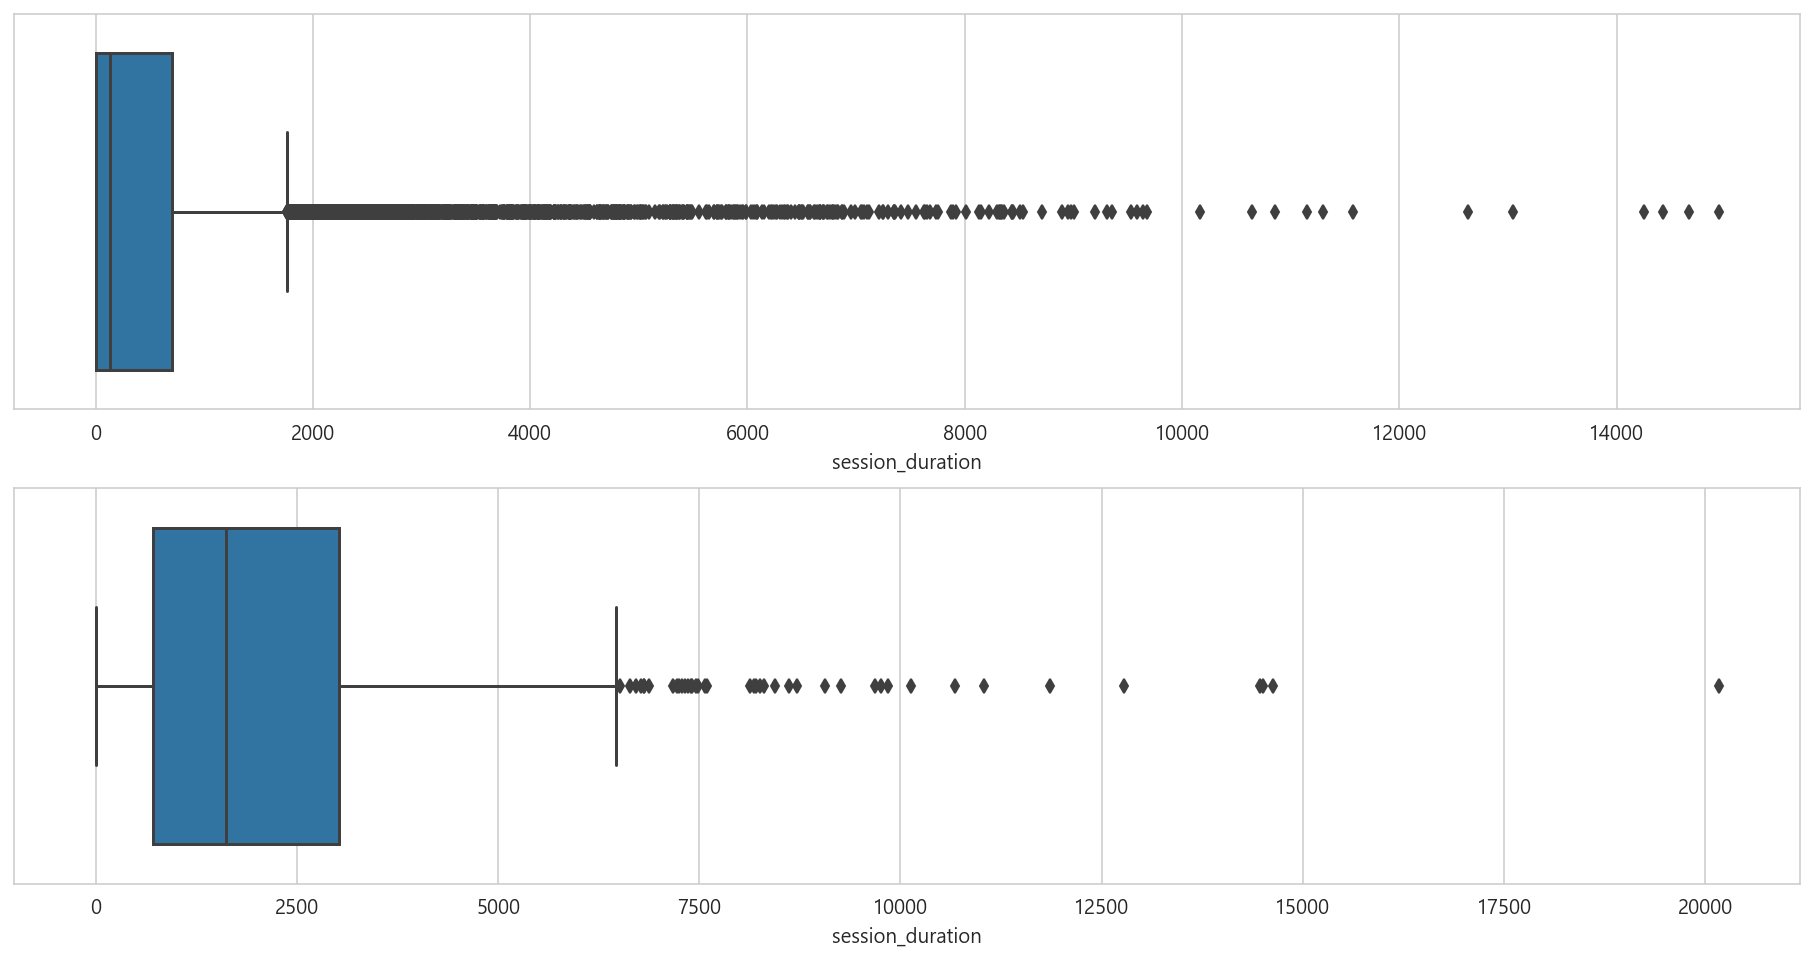

In [63]:
figure, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1)

figure.set_size_inches(16,8)

sns.boxplot(data = npurchase_session_duration, x = "session_duration", ax = ax1)
sns.boxplot(data = purchase_session_duration, x = "session_duration", ax = ax2)

purchase_session_mean = purchase_session_duration['session_duration'].mean()
npurchase_session_mean = npurchase_session_duration['session_duration'].mean()

print("구매 session 잔존 시간 평균:",purchase_session_mean)
print("비구매 session 잔존 시간 평균:",npurchase_session_mean)